In [10]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [11]:
Nx = 201
Ny = 201

x = np.linspace(0,20,Nx)
y = np.linspace(0,20,Ny)

h = x[1] - x[0]
h

0.1

In [12]:
def InitT():
    
    T = np.zeros((Nx,Ny))
    
    T[0,:] = 10.
    T[-1,:] = 0.
    T[:,0] = 0.
    T[:,-1] = 0.
    
    return T

In [13]:
T = InitT()
T

array([[ 0., 10., 10., ..., 10., 10.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [14]:
def Relajacion(T,Nit = int(1e3), omega = 0.5 ,tolerancia = 1e-3):
    
    itmax = 0
    
    
    for it in tqdm(range(Nit)):
        
        dmax = 0.
        
        for i in range(1, len(x)-1):
            for j in range(1, len(y)-1):
                
                tmp = 0.25*(T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1]) - (np.e**(-x[i]*y[j]))*(h**2)
                
                # Matriz resta
                r = omega*(tmp - T[i,j])
                
                # Actualizo la matrix
                T[i,j] += r
                
                if np.abs(r) > dmax:
                    dmax = r
                    
        #print(np.round(T,2))
                
        
        if np.abs(dmax) < tolerancia:
            
            print(it)
            itmax = it
            break
            
    return T,itmax

In [15]:
Tf1,_ = Relajacion(T)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [03:15<00:00,  5.12it/s]


<IPython.core.display.Javascript object>


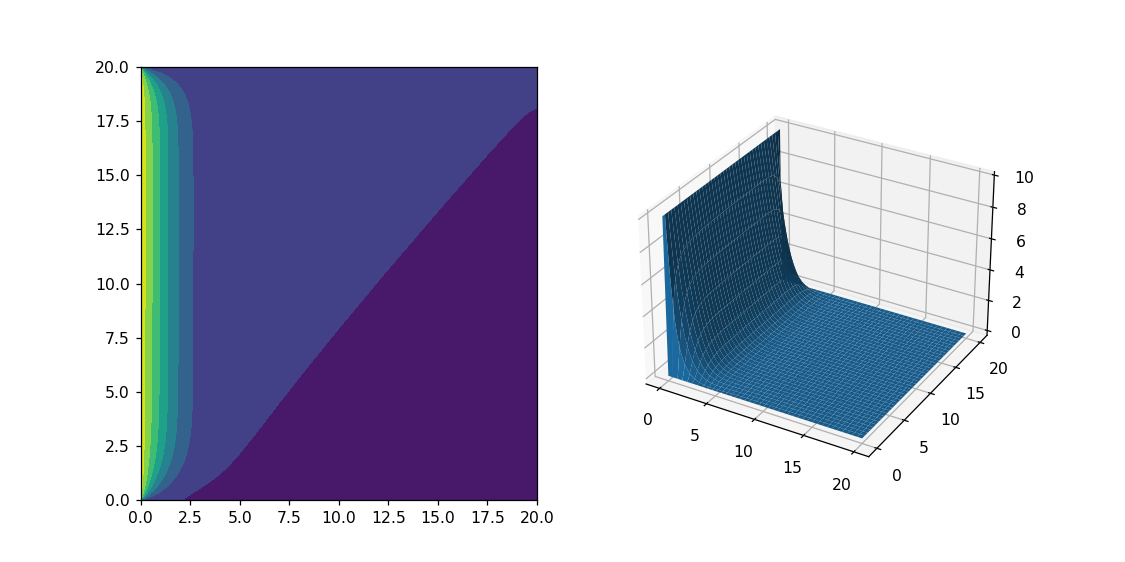

In [16]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122, projection='3d')

X,Y = np.meshgrid(x,y)

c = ax.contourf(X,Y,Tf1.T)

ax1.plot_surface(X,Y,Tf1.T)